In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as st

In [2]:
# import .csv
csv_path = "wine_data.csv"
wine_df = pd.read_csv(csv_path, low_memory=False)
wine_df

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot
134426,South Africa,82,14.0,Paarl,NaN,Merlot


In [3]:
variety_path = "variety_data.csv"
variety_df = pd.read_csv(variety_path, low_memory=False)
variety_df

,Country,Points,Price,Province,Region,Variety
0,US,95,90.0,Oregon,Willamette Valley,Chardonnay
1,US,95,60.0,California,Edna Valley,Chardonnay
2,US,90,37.0,California,Russian River Valley,Chardonnay
3,US,90,42.0,Washington,Columbia Valley (WA),Chardonnay
4,US,90,18.0,California,Russian River Valley,Chardonnay
...,...,...,...,...,...,...
106390,South Africa,89,30.0,Paarl,NaN,Viognier
106391,South Africa,88,19.0,Coastal Region,NaN,Viognier
106392,South Africa,88,14.0,Coastal Region,NaN,Viognier
106393,South Africa,87,20.0,Coastal Region,NaN,Viognier


In [4]:
# jeanaej's code starts here

## By Country

In [5]:
# Get the countries
countries = wine_df["Country"].unique()
countries = sorted(countries)
countries

['Argentina',
 'Australia',
 'Austria',
 'Chile',
 'France',
 'Germany',
 'Italy',
 'New Zealand',
 'Portugal',
 'South Africa',
 'Spain',
 'US']

In [6]:
# Grouping by country
country_group = wine_df.groupby(["Country"])

# Getting the mean of points and price
points_c_mean = country_group["Points"].mean()
price_c_mean = country_group["Price"].mean()

# Getting the median of points and price
points_c_median = country_group["Points"].median()
price_c_median = country_group["Price"].median()

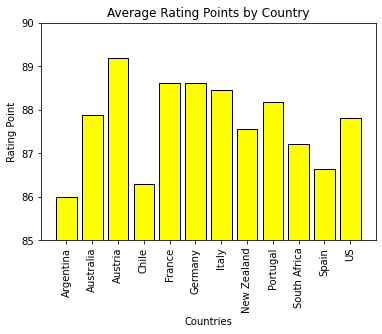

In [7]:
# Creating a bar graph Average rating by country
plt.bar(countries, points_c_mean, align = "center", color = "yellow", edgecolor ="black")

# Labeling graphs
plt.title("Average Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Rating Point")
plt.xticks(rotation = 90)

# Making the y-values start at 85 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90)
plt.show()

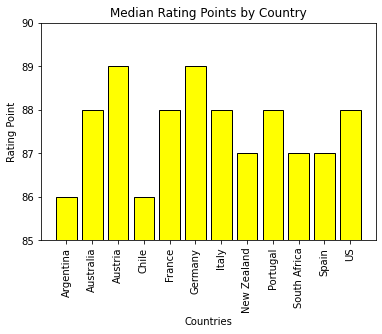

In [8]:
# Creating a bar graph Median rating by country
plt.bar(countries, points_c_median, align = "center", color = "yellow", edgecolor ="black")

# Labeling graphs
plt.title("Median Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Rating Point")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90)
plt.show()

Difference between Average and Median.

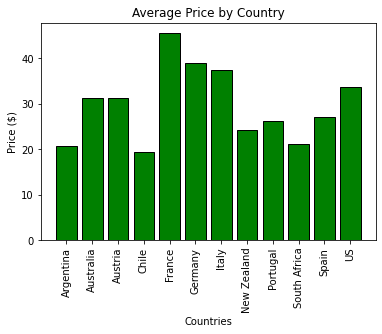

In [9]:
# Creating a bar graph Average Price by country
plt.bar(countries, price_c_mean, align = "center", color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Average Price by Country")
plt.xlabel("Countries")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

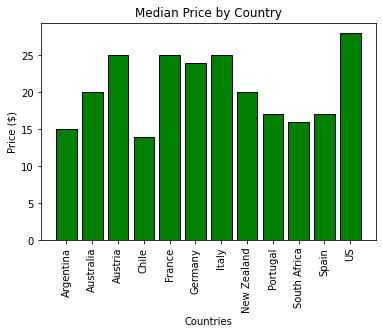

In [10]:
# Creating a bar graph Median Price by country
plt.bar(countries, price_c_median, align = "center", color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Median Price by Country")
plt.xlabel("Countries")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

Difference between Average and Median.

## By Variety

In [11]:
# Getting the varieties
varieties = wine_df["Variety"].unique()
varieties = sorted(varieties)
varieties

['Aglianico',
 'Airen',
 'Albana',
 'Albariño',
 'Albarossa',
 'Albarín',
 'Aleatico',
 'Alfrocheiro',
 'Alicante',
 'Alicante Bouschet',
 'Aligoté',
 'Alsace white blend',
 'Altesse',
 'Alvarelhão',
 'Alvarinho',
 'Alvarinho-Chardonnay',
 'Angevine',
 'Ansonica',
 'Antão Vaz',
 'Apple',
 'Aragonez',
 'Aragonês',
 'Arinto',
 'Arneis',
 'Austrian Red Blend',
 'Austrian white blend',
 'Auxerrois',
 'Avesso',
 'Azal',
 'Baco Noir',
 'Baga',
 'Baga-Touriga Nacional',
 'Barbera',
 'Bastardo',
 'Bical',
 'Black Monukka',
 'Black Muscat',
 'Blauburgunder',
 'Blauer Portugieser',
 'Blaufränkisch',
 'Bobal',
 'Bombino Bianco',
 'Bonarda',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Bovale',
 'Brachetto',
 'Braucol',
 'Bual',
 'Bukettraube',
 'Cabernet',
 'Cabernet Blend',
 'Cabernet Franc',
 'Cabernet Franc-Cabernet Sauvignon',
 'Cabernet Franc-Carmenère',
 'Cabernet Franc-Malbec',
 'Cabernet Franc-Merlot',
 'Cabernet Franc-Tempranillo',
 'Cabernet Merlot',
 'Cabernet Pfeffer'

In [12]:
# Grouping by varieties
wine_variety_group = wine_df.groupby(["Variety"])

# Getting the mean of points and price
points_wv_mean = wine_variety_group["Points"].mean()
price_wv_mean = wine_variety_group["Price"].mean()

# Getting the median of points and price
points_wv_median = wine_variety_group["Points"].median()
price_wv_median = wine_variety_group["Price"].median()

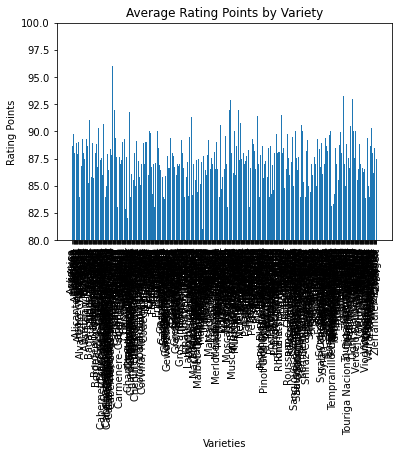

In [13]:
# Creating a bar graph Average points by varietal
plt.bar(varieties, points_wv_mean, align = "center")

# Labeling the graph
plt.title("Average Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 80. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 80.
plt.ylim(80,100)
plt.show()

There are 545 different varieties within the cleaned wine data set. In order to further analyze the price and rating points of wine varieties, we created another data set with the 25 top ranked varieties.

In [14]:
# Getting the Top 25 Variety names
top_varieties = variety_df["Variety"].unique()
top_varieties = sorted(top_varieties)
top_varieties

['Bordeaux-style Red Blend',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Chardonnay',
 'Corvina, Rondinella, Molinara',
 'Malbec',
 'Merlot',
 'Nebbiolo',
 'Pinot Grigio',
 'Pinot Gris',
 'Pinot Noir',
 'Portuguese Red',
 'Red Blend',
 'Rhône-style Red Blend',
 'Riesling',
 'Rosé',
 'Sangiovese',
 'Sauvignon Blanc',
 'Shiraz',
 'Sparkling Blend',
 'Syrah',
 'Tempranillo',
 'Viognier',
 'White Blend',
 'Zinfandel']

In [15]:
# Grouping by varieties
varieties_group = variety_df.groupby(["Variety"])

# Getting the mean of points and price
points_v_mean = varieties_group["Points"].mean()
price_v_mean = varieties_group["Price"].mean()

# Getting the median of points and price
points_v_median = varieties_group["Points"].median()
price_v_median = varieties_group["Price"].median()

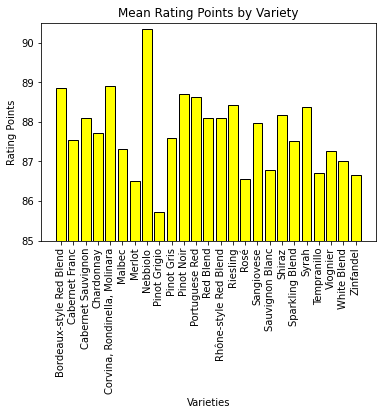

In [16]:
# Creating a bar graph Median points by varietal
plt.bar(top_varieties, points_v_mean, align = "center", color = "yellow", edgecolor ="black")

# Labeling the graph
plt.title("Mean Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)

# Making the y-values start at 85 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90.5)
plt.show()

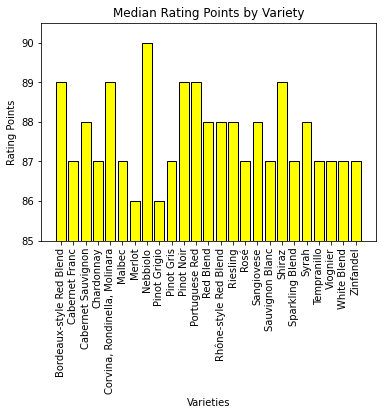

In [17]:
# Creating a bar graph Median points by varietal
plt.bar(top_varieties, points_v_median, align = "center", color = "yellow", edgecolor ="black")

# Labeling the graph
plt.title("Median Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)

# Making the y-values start at 85 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90.5)
plt.show()

Difference between Average and Median

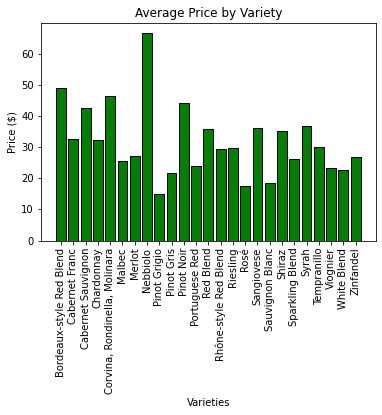

In [18]:
# Creating a bar graph Average Price by varietal
plt.bar(top_varieties, price_v_mean, align = "center",color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Average Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

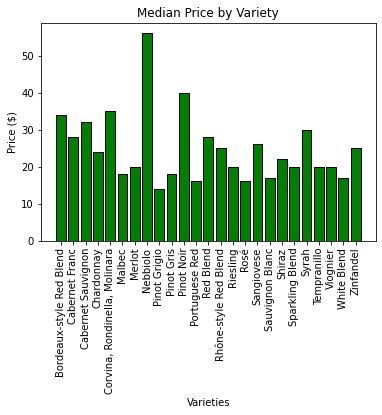

In [19]:
# Creating a bar graph Median Price by varietal
plt.bar(top_varieties, price_v_median, align = "center", color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Median Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

Difference between Average and Median

## All Wine

In [20]:
# Get the Price and Points of Wines
all_price = wine_df["Price"]
all_points = wine_df["Points"]

### Price by Rating

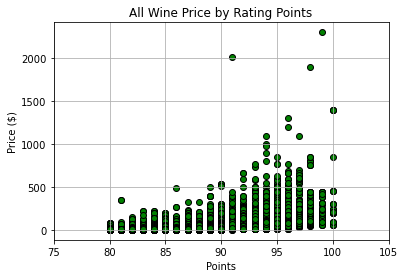

In [21]:
# Generate a scatter plot of the Price by Rating Points of all wines
plt.scatter(all_points, all_price, color = "green", edgecolor = "black")

# Labeling the graph
plt.title(f"All Wine Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim(75,105)
plt.grid(True)

plt.show()

In [22]:
# Calculate the correlation coefficient
r = st.pearsonr(all_points, all_price)
r_sq = r[0]**2

# Calculate the linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(all_points, all_price)
regress_values = all_points * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'


print(f'The correlation coefficient of price and rating points for all wines {round(rvalue,2)}\n')
print(f'The coefficient of determination of price and rating points for all wines {round(r_sq,2)}\n')
print(line_eq)

The correlation coefficient of price and rating points for all wines 0.46

The coefficient of determination of price and rating points for all wines 0.21

 y = 5.21 x + -424.22


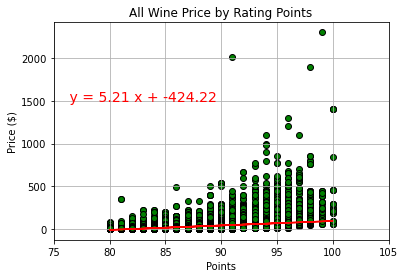

In [23]:
# Generate a scatter plot of the Price by Rating Points of all wines
# with the linear regression line and equation

plt.plot(all_points,regress_values, "r-")
plt.scatter(all_points, all_price, color = "green", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"All Wine Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim(75,105)
plt.grid(True)
plt.annotate(line_eq, (76,1500), fontsize = 14, color ="r")

plt.show()

## Wines Below $25

In [24]:
# Create a new dataframe with economical priced wine
low_price = 25
low_price_df = wine_df.loc[wine_df["Price"] <= low_price]
low_price_df

,Country,Points,Price,Province,Region,Variety
11,US,95,24.0,California,Napa Valley,Rosé
23,US,90,18.0,California,Russian River Valley,Chardonnay
25,US,90,25.0,New York,Finger Lakes,Riesling
33,US,91,19.0,Oregon,Willamette Valley,Pinot Gris
38,US,91,22.0,California,Napa Valley,Cabernet Sauvignon
...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot
134426,South Africa,82,14.0,Paarl,NaN,Merlot


In [25]:
# Get the Price and Points of Economical Wines
lp_price = low_price_df["Price"]
lp_points = low_price_df["Points"]

### Price by Rating Points

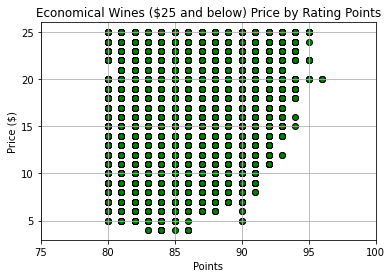

In [26]:
# Generate a scatter plot of the Price by Rating Points of Economical wines
plt.scatter(lp_points, lp_price, color = "green", edgecolor = "black")

# Labeling the graph
plt.title(f"Economical Wines (${low_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim(75,100)
plt.grid(True)

plt.show()

In [27]:
# Calculate the correlation coefficient
r = st.pearsonr(lp_points, lp_price)
r_sq = r[0]**2



# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lp_points, lp_price)
regress_values = lp_points * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'


print(f'The correlation coefficient of price and rating points for all wines {round(rvalue,2)}\n')
print(f'The coefficient of determination of price and rating points for all wines {round(r_sq,2)}\n')
print(line_eq)

The correlation coefficient of price and rating points for all wines 0.37

The coefficient of determination of price and rating points for all wines 0.14

 y = 0.72 x + -45.64


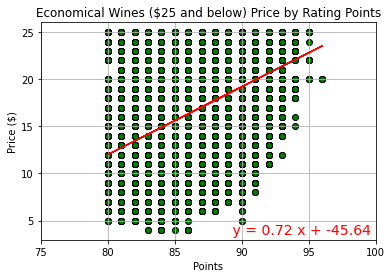

In [28]:
# Generate a scatter plot of the Price by Rating Points of Economical wines
# with the linear regression line and equation

plt.plot(lp_points,regress_values, "r-")
plt.scatter(lp_points, lp_price, color = "green", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Economical Wines (${low_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim(75,100)
plt.grid(True)
plt.annotate(line_eq, (89,3.5), fontsize = 14, color ="r")

plt.show()

## Wines Above $100

In [29]:
high_price = 100
high_price_df = wine_df.loc[wine_df["Price"] >= high_price]
high_price_df

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
7,US,95,185.0,Oregon,Dundee Hills,Pinot Noir
9,US,95,325.0,California,Diamond Mountain District,Cabernet Sauvignon
15,US,94,105.0,Oregon,Willamette Valley,Pinot Noir
54,US,86,125.0,California,Howell Mountain,Cabernet Sauvignon
...,...,...,...,...,...,...
132746,South Africa,92,100.0,Stellenbosch,NaN,Red Blend
132857,South Africa,91,100.0,Stellenbosch,NaN,Red Blend
133446,South Africa,91,100.0,Stellenbosch,NaN,Red Blend
133799,South Africa,92,145.0,Stellenbosch,NaN,Cabernet Blend


In [30]:
# Get the Price and Points of Expensive Wines
hp_price = high_price_df["Price"]
hp_points = high_price_df["Points"]

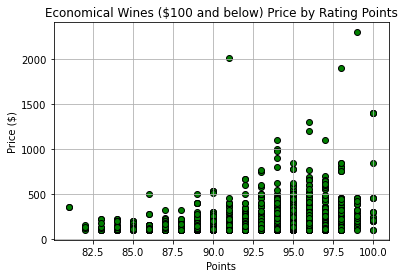

In [31]:
# Generate a scatter plot of the Price by Rating Points of expensive wines
plt.scatter(hp_points, hp_price, color = "green", edgecolor = "black")

# Labeling the graph
plt.title(f"Economical Wines (${high_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim()
plt.grid(True)

plt.show()

In [32]:
# Calculate the correlation coefficient
r = st.pearsonr(hp_points, hp_price)
r_sq = r[0]**2

# Calculate the linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(hp_points, hp_price)
regress_values = hp_points * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'


print(f'The correlation coefficient of price and rating points for all wines {round(rvalue,2)}\n')
print(f'The coefficient of determination of price and rating points for all wines {round(r_sq,2)}\n')
print(line_eq)

The correlation coefficient of price and rating points for all wines 0.28

The coefficient of determination of price and rating points for all wines 0.08

 y = 11.67 x + -913.93


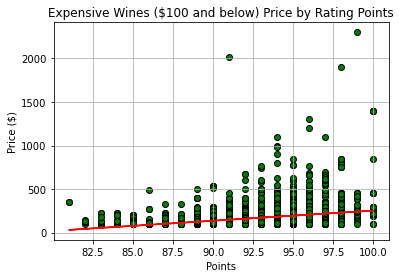

In [33]:
# Generate a scatter plot of the Price by rating Points of Expensive Wines
# with the linear regression line and equation

plt.plot(hp_points,regress_values, "r-")
plt.scatter(hp_points, hp_price, color = "green", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Expensive Wines (${high_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim()
plt.grid(True)
plt.annotate(line_eq, (80,1500), fontsize = 14, color ="r")

plt.show()

## France vs Italy

In [49]:
# Create a new dataframe with a Country
country_one = "Austria"

# Create a new dataframe with another Country
country_two = "Germany"

# Put countries to compare into a list for for loop 
country_comparisons = [country_one, country_two]
country_comparisons

['Austria', 'Germany']

### Comparing Rating Points

In [63]:
# Create empty list to fill with points(for plotting)
compare_points = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For loop the get the wine rating points of the wines in compared countries

for country in country_comparisons:
    wine_results = wine_df.loc[wine_df["Country"] == country]
    
    # Locate the rows which Country on Wine_df and get the wine rating points
  
    wine_points = wine_results["Points"]
    
    # Add subset
    
    compare_points.append(wine_points)
    
    # Determine outliers using upper and lower bounds using quartiles
  
    quartiles = wine_points.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"The interquartile range of Rating points for {country} is: {round(iqr,2)}")
    print(f"The values below {round(lower_bound,2)} could be outlier for {country}")
    print(f"The values above {round(upper_bound,2)} could be outlier for {country}\n")

The interquartile range of Rating points for Austria is: 3.0
The values below 83.5 could be outlier for Austria
The values above 95.5 could be outlier for Austria

The interquartile range of Rating points for Germany is: 3.0
The values below 82.5 could be outlier for Germany
The values above 94.5 could be outlier for Germany



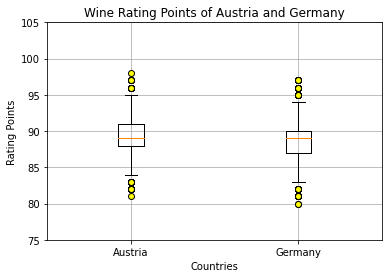

In [64]:
# Generate a box plot of the rating points of each wine in 2 compared countries
outlier = dict(markerfacecolor = 'yellow', marker = "o")
fig1,ax1 = plt.subplots()
ax1.boxplot(compare_points, labels = country_comparisons, showfliers = True, flierprops = outlier)
ax1.set_title(f"Wine Rating Points of {country_one} and {country_two}")
ax1.set_ylim(75,105)
ax1.set_ylabel("Rating Points")
ax1.set_xlabel("Countries")
ax1.grid(True)
plt.show()

In [88]:
st.f_oneway(country_one_points, country_two_points)

F_onewayResult(statistic=4.200310856724653e-29, pvalue=1.0)

With a p-value of 1 on an ANOVA test, we fail to reject the null; where the null hypothesis is says 2 or more groups have the same population mean. Therefore, we fail to reject that Austria and Germany have the same average rating points.

### Comparing Price

In [65]:
# Create empty list to fill with price(for plotting)
compare_price = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For loop the get the wine price of the wines in compared countries

for country in country_comparisons:
    wine_results = wine_df.loc[wine_df["Country"] == country]
    
    # Locate the rows which Country on Wine_df and get the wine price
  
    wine_price = wine_results["Price"]
    
    # Add subset
    
    compare_price.append(wine_price)
    
    # Determine outliers using upper and lower bounds using quartiles
  
    quartiles = wine_price.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"The interquartile range of Price for {country} is: {round(iqr,2)}")
    print(f"The values below {round(lower_bound,2)} could be outlier for {country}")
    print(f"The values above {round(upper_bound,2)} could be outlier for {country}\n")

The interquartile range of Price for Austria is: 20.0
The values below -12.0 could be outlier for Austria
The values above 68.0 could be outlier for Austria

The interquartile range of Price for Germany is: 22.0
The values below -15.0 could be outlier for Germany
The values above 73.0 could be outlier for Germany



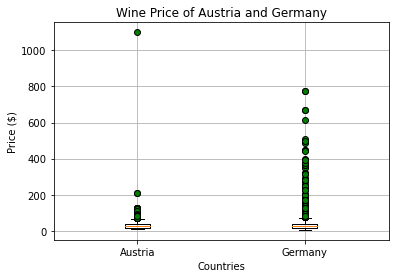

In [66]:
# Generate a box plot of the price of each wine in 2 compared countries
outlier = dict(markerfacecolor = 'green', marker = "o")
fig1,ax1 = plt.subplots()
ax1.boxplot(compare_price, labels = country_comparisons, showfliers = True, flierprops = outlier)

ax1.set_title(f"Wine Price of {country_one} and {country_two}")
ax1.set_ylabel("Price ($)")
ax1.set_xlabel("Countries")

ax1.grid(True)
plt.show()

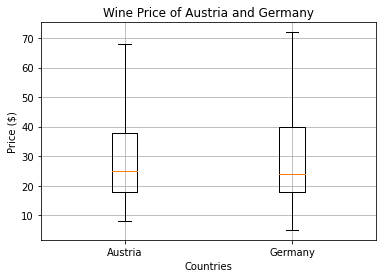

In [67]:
# Generate a box plot of the price of each wine in 2 compared countries
outlier = dict(markerfacecolor = 'green', marker = "o")
fig1,ax1 = plt.subplots()
ax1.boxplot(compare_price, labels = country_comparisons, showfliers = False)

ax1.set_title(f"Wine Price of {country_one} and {country_two}")
ax1.set_ylabel("Price ($)")
ax1.set_xlabel("Countries")

ax1.grid(True)
plt.show()

### Null Hypothesis

In [87]:
st.f_oneway(country_one_price, country_two_price)

F_onewayResult(statistic=9.539496837472024e-32, pvalue=1.0)

With a p-value of 1 on an ANOVA test, we fail to reject the null; where the null hypothesis is says 2 or more groups have the same population mean. Therefore, we fail to reject that Austria and Germany have the same average wine price.

### Comparing Price by Rating Points Regression

#### Country One

In [69]:
# Get the price and points of country one
wine_results_one = wine_df.loc[wine_df["Country"] == country_one]  
country_one_points = wine_results["Points"]
country_one_price = wine_results["Price"]
country_one_price

129844    23.0
129845    39.0
129846    25.0
129847    31.0
129848    40.0
          ... 
132186    20.0
132187    20.0
132188    23.0
132189    21.0
132190    19.0
Name: Price, Length: 2347, dtype: float64

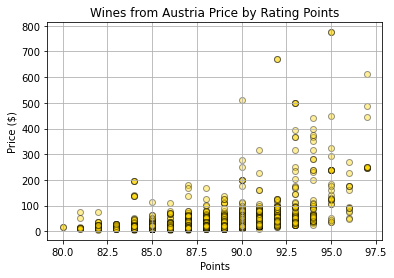

In [79]:
# Create price by points scatter plot for country one
plt.scatter(country_one_points, country_one_price, color = "gold", edgecolor = "black", alpha = .4)

# Labeling the graph
plt.title(f"Wines from {country_one} Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.ylim()
plt.grid(True)
plt.show()

In [80]:
# Calculate the correlation coefficient
r = st.pearsonr(country_one_points, country_one_price)
r_sq = r[0]**2

# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(country_one_points, country_one_price)
regress_values = country_one_points * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'


print(f'The correlation coefficient of price and rating points for all wines {round(rvalue,2)}\n')
print(f'The coefficient of determination of price and rating points for all wines {round(r_sq,2)}\n')
print(line_eq)

The correlation coefficient of price and rating points for all wines 0.41

The coefficient of determination of price and rating points for all wines 0.17

 y = 7.95 x + -665.16


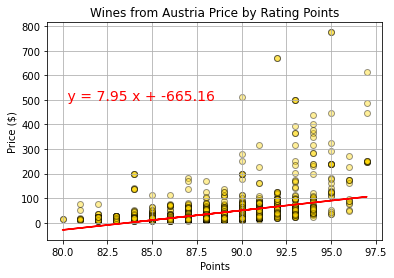

In [84]:
# Generate a scatter plot of the Rating Points by Price of wines from country one
# with the linear regression line and equation

plt.plot(country_one_points,regress_values, "r-")
plt.scatter(country_one_points, country_one_price, color = "gold", edgecolor = "black", alpha = .4)

# Labeling the graph with the Linear Regression
plt.title(f"Wines from {country_one} Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.ylim()
plt.grid(True)
plt.annotate(line_eq, (80, 500), fontsize = 14, color ="r")

plt.show()

#### Country Two

In [59]:
# Get the price and points of country one
wine_results_two = wine_df.loc[wine_df["Country"] == country_two]  
country_two_points = wine_results["Points"]
country_two_price = wine_results["Price"]
country_two_price

129844    23.0
129845    39.0
129846    25.0
129847    31.0
129848    40.0
          ... 
132186    20.0
132187    20.0
132188    23.0
132189    21.0
132190    19.0
Name: Price, Length: 2347, dtype: float64

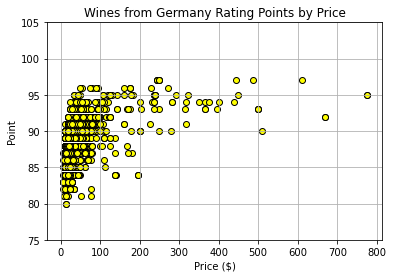

In [60]:
# Create points by price scatter plot for country two
plt.scatter(country_two_price, country_two_points, color = "yellow", edgecolor = "black")

# Labeling the graph
plt.title(f"Wines from {country_two} Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Point")

plt.ylim(75,105)
plt.grid(True)

plt.show()

In [61]:
# Calculate the correlation coefficient
r = st.pearsonr(country_two_price, country_two_points)
r_sq = r[0]**2



# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(country_two_price, country_two_points)
regress_values = country_two_price * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'


print(f'The correlation coefficient of price and rating points for all wines {round(rvalue,2)}\n')
print(f'The coefficient of determination of price and rating points for all wines {round(r_sq,2)}\n')
print(line_eq)

The correlation coefficient of price and rating points for all wines 0.41

The coefficient of determination of price and rating points for all wines 0.17

 y = 0.02 x + 87.79


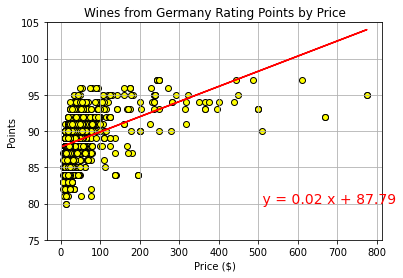

In [62]:
# Generate a scatter plot of the Rating Points by Price of wines from country two
# with the linear regression line and equation

plt.plot(country_two_price,regress_values, "r-")
plt.scatter(country_two_price, country_two_points, color = "yellow", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Wines from {country_two} Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Points")

plt.ylim(75,105)
plt.grid(True)
plt.annotate(line_eq, (500,80), fontsize = 14, color ="r")

plt.show()

### Tried to combine the scatter plots

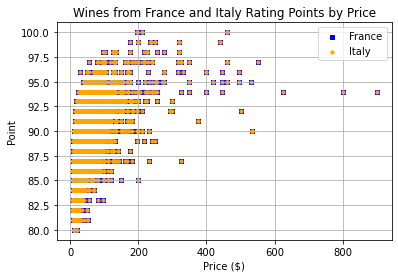

In [48]:
# Create a grah of rating points by price for both country one and two
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(country_one_price, country_one_points, s=10, c='blue', marker="s", label= country_one)
ax1.scatter(country_two_price,country_two_points, s=10, c='orange', marker="o", label= country_two)


plt.title(f"Wines from {country_one} and {country_two} Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Point")

plt.legend(loc='best')
plt.grid(True)

plt.show()

In [ ]:
# jeannaej's code ends here

In [ ]:
# natalia's code starts here

In [ ]:
wine_df.nunique()

In [ ]:
US_only = wine_df.loc[wine_df["Country"] == "US"]
US_only

In [ ]:
us_var = US_only.groupby("Variety")
us_varieties = us_var.count()
us_varieties

In [ ]:
# Summing all varieties that will be lummped together
other = 0
for variety, row in us_varieties.iterrows():
    if row["Country"] < 1000:
        added = row["Country"]
        other = other + added
    else:
        pass
        
print(other)

In [ ]:
# Returns the top 40 varietals from US wineries
us_var_top = us_varieties.loc[us_varieties["Country"] >= 1000]

In [ ]:
us_var_top.head()

In [ ]:
us_var_top.loc["Other Wine (206 Varietals)"] = [12575,12575,12575,12575,12575]
us_var_top = us_var_top.sort_values(by="Country", ascending=False)
us_var_top

In [ ]:
# Labels for the sections of our pie chart
labels = us_var_top.index

# The values of each section of the pie chart
sizes = us_var_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

In [ ]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, radius=2.5)
plt.show()

In [ ]:
province = US_only.groupby("Province").count().sort_values(by="Country", ascending=False)
province

In [ ]:
# Summing all varieties that will be lummped together
other_prov = 0
for prov, row in province.iterrows():
    if row["Country"] < 100:
        added_prov = row["Country"]
        other_prov = other_prov + added_prov
    else:
        pass
        
print(other_prov)

In [ ]:
# Returns the top wine producing provinces in the US
province_top = province.loc[province["Country"] >1000]
province_top

In [ ]:
province_top.loc["Other Provinces (469 Provinces)"] = [469,469,469,469,469]
province_top = province_top.sort_values(by="Country", ascending=False)
province_top

In [ ]:
# Labels for the sections of our pie chart
labels = province_top.index

# The values of each section of the pie chart
sizes = province_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0.1, 0, 0, 0, 0)

In [ ]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, radius=2.5)
plt.show()

In [ ]:
patches, text = plt.pie(sizes, shadow=True, explode=explode, startangle=90, radius=2.5)
    
plt.legend(patches, labels, loc="best", bbox_to_anchor=(-0.1,1.), fontsize=12)
plt.show()

# Avoiding overlapping labels
# https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart 
# Accessed 14 Feb 2021

In [ ]:
ratio_df = wine_df
ratio_df["Points:Price"] = ratio_df["Points"]/ratio_df["Price"]
ratio_df

In [ ]:
mean = ratio_df.groupby("Country").mean()
mean

In [ ]:
median = ratio_df.groupby("Country").median()
median

In [ ]:
mean_median = pd.merge(mean, median, left_index=True, right_index=True, suffixes=("_mean","_median"))
best = mean_median.sort_values(by="Points:Price_mean", ascending=False)

In [ ]:
x_axis_country = best.index
point_per = best["Points:Price_mean"]
plt.bar(x_axis_country, point_per, align="center")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Points per Dollar")
plt.title("Average Points per Dollar")

plt.show()

In [ ]:
# natalia's code ends here

In [ ]:
# sharon's code starts here

In [ ]:
# sharon's code ends here